<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/2_PracticoAyC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Mentoria Diplomatura en Ciencia de Datos 2020**
### "Detección del desarrollo del cultivo con imágenes de Drones"


###**Analisis y Curación de datos**
Se propone la elaboración de un informe o presentacion, en formato jupyter notebook que responda a las cuestiones solicitadas en cada seccion de este notebook.El informe debe contener los resultado obtenidos de cada items.



En este práctico partiremos de los datos crudos "Dron1.csv" como al inicio del práctico de visualización, e incluiremos algunos más. La idea general es dejar preparado un único dataset que nos permita alimentar futuros modelos de aprendizaje automático.

Deberán incluir la información meteorológica "clima_2018.csv" pertinente en el dataset final.Para unificar los reportes, se recomienda utilizar el método "merge" de pandas ó el que ustedes elijan.

Es importante que cada decisión que tomen sobre los datos quede debidamente documentada.

Se recomienda trabajar empleando algún checklist para asegurarse de cumplir todas las etapas del proceso de curación. Pueden utilizar el checklist que vieron en clase, o algún otro que consideren más apropiado (en las referencias tienen uno a modo de ejemplo).

###ACLARACIONES###



####**Chequeos puntuales por campo**
Campo **"RDTO"**:Es una variable contínua que representa uno de los targets para algoritmos con salidas de variables contínuas

Campo **"Conj de datos"**: Verán que en este campo aparecen dos categorias que se asocian al momento de siembra diferente dentro del mismo ensayo. Las categorías "1rasiembra", "2dasiembra" indican agronómicamente siembra temprana y siembra tardía no puede haber un tipo distinto de categoría.

Campo **"ciclo"**: Este campo también indica categorías bipuntuales.Cada genotipo tiene un determinado ciclo fenológico, ésta variable indica a que ciclo pertenece cada uno.Son grupos de interés y se encuentran tanto en fechas tempranas como en tardías. 

Campo **"Roya"**: Noten que este campo en particular contiene muchos valores pertencientes a la categoría nulos que significa ausencia de la enfermedad. Deberán determinar que hacer si es necesario incorporarla o no.

Campo **"Manchas Foliares"**: No presenta variabilidad ni valores contundentes, significa que el cultivo en general no adolece de la enfermedad. Deberán decidir y documentar.

Campo **"Fusariosis, Carbón y Adversidad"**:Observa que las categorías son muy diferentes en cardinalidad significa que no presenta enfermedades el cultivo. Decidir y documentar acerca de éstas variables.Acá deberán evaluar si conviene modificar el campo. Por ejemplo, mantener las categorías  y recategorizar las demás como "Otras". En cualquier caso, justifiquen la decisión tomada.

Campo **"Zadok"**; Es nuestro otro target y es una variable categórica la variable zadok describe el estadío fenológico en que se encuentran las variedades e inclusive el ensayo discrimina dos estadíos fenológicos de la misma variedad utilizando fechas de siembras diferentes. Observar y documentar.
 
Campo **"Fecha espigazón"**: Esta es la fecha en la que se medió el comienzo de la espigazón para cada variedad. Corroborar que la misma es anterior a la fecha de madurez.Verificar que las fechas pertenecen al rango temporal correspondiente (en este caso,sólo al año 2018). Son datos cargados manualmente con muchos errores los 2016 7 2015 agregar a 2018, 

Campo **"Fecha madurez"**: Fecha que se mide manualmente en todas la variedades. Datos muy sucios pero que se deben corresponder a fechas posteriores a las fechas de espigazón, durante el 2018.Los 2016 y 2015 agregar a 2018.

Campo **"Variedades"**: Este campo indica los genotipos que se usaron en el ensayo, es interesante observar que las mismas variedades fueron implantadas en una fecha y en la otra. Deberán observar que variedades coincide exactamente con la variable parcela, decidir y documentar acerca del tratamiento de las mismas.

Campos **"Rep, Fila y Col"**: Van a ver que estos campos son bastante irrelevantes. Acá la recomendación es distinguir sólo si pertenece a la variedad o no y en que zadok está la misma variedad,en definitiva tenemos 3 parcelas con la misma variedad en la primera fecha de siembra, y 3 parcelas con exactamente la misma variedad en la segunda fecha de siembra pero en distinto estadío Zadok. 


###**Incorporación de información climática**
El dataset "climaReporte_2018.csv" contiene información climática segmentada por día. Esta información es de carácter público y fue obtenida del Sistema de gestión Clima del Dpto de información agronómica de BCCBA,  https://clima.bccba.org.ar/accounts/login/?next=/ . Determinen qué información puede ser relevante para la problemática de la mentoría e incorporenla al dataset agronómico obteniendo un dataset final.



###Referencias
https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning

##**Importamos paquetes**

In [106]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [107]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

In [108]:
import os

In [109]:
from google.colab import drive
drive.mount('/content/drive')

In [110]:
DATA_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/Diplo Famaf/Mentoria/'

##Consigna para Curación y Exploración del Dataset

##I. Rutina de Curación
Inicialmente, con el objetivo de preparar los datos que alimentarán futuros modelos de aprendizaje automático (ML), se propone seguir la siguiente checklist para la limpieza de los datos de nuestro proyecto. Esta checklist es la misma que utilizaron en el primer práctico de la materia y nos será de utilidad como guía para curar el dataset. A modo de ayuda, en esta notebook encontrarán una especie de template que sigue la checklist y que deberán ir completando.

Cada decisión tomada deberá quedar registrada de manera explícita y clara. Luego de pasar por todos los puntos de la checklist propuesta, deberán almacenar en un nuevo archivo los datos resultantes. A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes, ya que éstas están relacionadas a decisiones que adoptaremos más adelante, como por ejemplo, sobre si es necesario crear nuevas features y si incluirlas o no. Recuerden que la ciencia de datos es un proceso circular, continuo y no lineal. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.
###**1. Importación de Datos**
####1.1 Cargamos datos agronómicos

In [111]:
#Editar con el path correspondiente a sus datos
dfa = pd.read_csv(os.path.join(DATA_DIRECTORY,'Dron1.csv'),decimal=".",sep=",")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
print(dfa.shape)
dfa.sample(5)

(38920, 45)


,Longitude,Latitude,Conjunto de datos,ID,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
17083,-2.057.298.416.126.710,-2.120.844.517.643.980,1er Siembra,8938,CC,Variedad_M,3,61,6.7,3,2,64200,15200,83000,41230,16035,-0.6762,-0.4400,-1.0143,0.6507,0.0267,1.0549,0.1932,-0.9444,10.6269,-0.6904,-0.9351,-1.0694,1,cero,cero,0,0.05,14/9/2015,19/11/2015,66,1.0,80.0,2.0,79.4,40.0,2190,10.8,2271,4543
4202,-2.057.298.912.577.390,-2.120.835.509.455.540,1er Siembra,16600,CL,Variedad_K,2,15,5.9,2,21,52200,12390,53600,34340,18494,-0.4869,-0.2999,-0.7304,0.6159,0.1976,1.4927,0.3450,-0.6189,10.4441,-0.6245,-0.8986,-1.1129,1,cero,cero,0,0.00,5/10/2016,26/11/2016,52,2.0,83.0,2.0,76.0,29.0,2400,9.6,2523,5046
21199,-2.057.277.434.003.780,-2.120.797.916.889.840,2daSiembra,857,CL,Variedad_R,1,76,4.5,1,41,51200,12050,46600,31980,17730,-0.4488,-0.2867,-0.6732,0.6388,0.1907,1.4714,0.3805,-0.5899,10.3729,-0.5891,-0.8747,-1.1433,0,cero,cero,0,0.00,8/10/2018,1/12/2018,54,1.5,70.0,4.5,73.5,25.0,2530,9.4,2665,5331
18167,-2.057.302.754.602.230,-2.120.844.952.544.090,1er Siembra,10022,CC,Variedad_I,3,64,5.9,3,5,56700,12820,65300,32180,15831,-0.6097,-0.3405,-0.9146,0.5585,0.1051,1.2349,0.2424,-0.7094,10.3791,-0.6718,-0.9258,-1.0802,1,cero,cero,0,0.00,15/9/2015,19/11/2015,65,1.5,65.0,2.0,76.6,44.0,1600,10.1,1673,3345
34258,-2.057.283.283.697.800,-2.120.811.462.782.570,2daSiembra,13916,CC,Variedad_T,2,126,6.3,2,30,66500,14640,77200,38420,15988,-0.6569,-0.4123,-0.9853,0.6277,0.0440,1.0921,0.2071,-0.8767,10.5563,-0.6812,-0.9306,-1.0746,2,cero,cero,0,10.00,27/9/2015,23/11/2015,57,1.5,80.0,2.0,75.7,38.0,2990,9.6,3143,6286


####1.2.Cargamos dataset de información climática


In [113]:
#Editar con el path correspondiente a sus datos
dfc = pd.read_csv(os.path.join(DATA_DIRECTORY,'ClimaReporte_2018.csv'),decimal=".",sep=",")

In [114]:
print(dfc.shape)
dfc.sample(5)

(122, 20)


,Fecha,Tem. [°C] Prom,Tem. [°C] Mín,Tem. [°C] Máx,Presion [hPa] Prom,Presion [hPa] Mín,Presion [hPa] Máx,Temp suelo [°C] Prom,Temp suelo [°C] Mín,Temp suelo [°C] Máx,Lluvia Acum[mm],Máx Inten. de Lluvia [mm/10min],Inten de Lluvia [mm/h],Vel de Viento [Km/h] Prom,Vel de Viento [Km/h] Máx,Hum [%HR] Prom,Hum [%HR] Mín,Hum [%HR] Máx,Raf. de Viento [km/h Prom,Raf. de Viento [km/h Máx
52,23/10/2018,15.251,13.49,17.90,984.158,981.250,988.125,-5.813,-6.2,-5.5,2.2,0.6,3.6,4.301,12.312,85.240,65.41,100.00,8.447,19.775
6,07/09/2018,17.740,9.75,27.70,981.128,976.875,985.625,18.923,16.4,22.0,0.0,0.0,0.0,10.664,22.712,54.341,30.24,83.58,17.990,36.009
51,22/10/2018,16.086,14.66,17.32,979.748,975.625,985.000,-5.144,-5.6,-4.5,3.0,1.4,8.4,8.621,21.485,93.341,83.85,100.00,14.418,32.267
4,05/09/2018,20.149,12.99,29.86,973.043,968.125,978.125,17.445,15.3,20.2,0.0,0.0,0.0,29.026,42.386,42.932,21.78,61.21,47.338,73.567
92,02/12/2018,17.358,13.20,22.58,984.874,979.375,989.375,-24.737,-25.7,-18.7,0.2,0.2,1.2,8.104,13.358,59.474,37.90,85.68,14.196,25.106


####Tipos de datos que tenemos

In [115]:
dfa.dtypes

Longitude               object
Latitude                object
Conjunto de datos       object
ID                       int64
Ciclos                  object
Variedad                object
Rep                      int64
Parcela                  int64
ZADOCK                 float64
fila                     int64
columna                  int64
Azul                     int64
Verde                    int64
Rojo                     int64
Borde rojo               int64
Infra Rojo               int64
NDVI                   float64
NDRE                   float64
SAVI                   float64
SCCI                   float64
GNDVI                  float64
GVI                    float64
RVI                    float64
RedEdgeVI              float64
LNVI                   float64
GRVI                   float64
MGRVI                  float64
NGRVI                  float64
Roya (%)                 int64
Manchas Foliares        object
Fusariosis              object
Carbon (%)               int64
Adversid

In [116]:
dfc.dtypes

Fecha                               object
Tem. [°C] Prom                     float64
Tem. [°C] Mín                      float64
Tem. [°C] Máx                      float64
Presion [hPa] Prom                 float64
Presion [hPa] Mín                  float64
Presion [hPa] Máx                  float64
Temp suelo [°C] Prom               float64
Temp suelo [°C] Mín                float64
Temp suelo [°C] Máx                float64
Lluvia Acum[mm]                    float64
Máx Inten. de Lluvia [mm/10min]    float64
Inten de Lluvia [mm/h]             float64
Vel de Viento [Km/h] Prom          float64
Vel de Viento [Km/h] Máx           float64
Hum [%HR] Prom                     float64
Hum [%HR] Mín                      float64
Hum [%HR] Máx                      float64
Raf. de Viento [km/h Prom          float64
Raf. de Viento [km/h Máx           float64
dtype: object

#### 1.3. Asegurar la Existencia de IDs o Claves Únicas

##### El siguiente paso implica chequear que no existen datos duplicados y que las claves, si existen, son únicas.

In [117]:
# Decidimos utilizar la columna 'ID ' como indice
dfa = pd.read_csv(os.path.join(DATA_DIRECTORY,'Dron1.csv'),decimal=".",sep=",",index_col=['ID '])
# Como Pandas acepta valores duplicados en los índices lo verificamos
pd.Series(dfa.index,dtype=str).describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


count     38920
unique    22398
top       16385
freq          2
Name: ID , dtype: object

In [118]:
# Se detectó que hay claves NO únicas, se define resetear
# los indices conservando los valores previos no repetidos
dfa = dfa.reset_index()
# Chequeamos nuevamente si las claves son únicas
pd.Series(dfa.index,dtype=str).describe()

count     38920
unique    38920
top       23033
freq          1
dtype: object

In [119]:
# Chequeamos si hay filas repetidas
print('Cantidad de filas repetidas (con el mismo contenido):')
len(dfa[dfa.duplicated()])

Cantidad de filas repetidas (con el mismo contenido):


0

- Ahora chequeamos dataset de información climática

In [120]:
# Decidimos utilizar la columna 'Fecha ' como indice
dfc = pd.read_csv(os.path.join(DATA_DIRECTORY,'ClimaReporte_2018.csv'),decimal=".",sep=",",index_col=['Fecha'])
# Como Pandas acepta valores duplicados en los índices lo verificamos
pd.Series(dfc.index,dtype=str).describe()

count            122
unique           122
top       05/10/2018
freq               1
Name: Fecha, dtype: object

In [121]:
# Chequeamos si hay filas repetidas
print('Cantidad de filas repetidas (con el mismo contenido):')
len(dfc[dfc.duplicated()])

Cantidad de filas repetidas (con el mismo contenido):


0

In [122]:
# Le asiganamos el tipo correcto a las variables de fechas
dfa['Fecha de madurez']=dfa['Fecha de madurez'].replace(regex={'2-Dec': '2/12/2018'}) #correjimo a mano para que no haya errores luego
#convertimos las fechas a datetime
dfa['Fecha de madurez']=pd.to_datetime(dfa['Fecha de madurez'])
dfa['Fecha de espigaz?']=pd.to_datetime(dfa['Fecha de espigaz?'])


####1.4. Despersonalizar Datos si hiciera falta y Guardarlos en un Nuevo Archivo

 Nunca Modificar los Datos Crudos u Originales

- Se considera que no es necesario despersonalizar datos ya que la información correspondiente al ensayo 2018 ya la tenemos a disposición bajo secreto estadístico de investigación y anonimización de variedades.

####**2. Pasos de Limpieza Necesarios**


####2.1.Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

In [123]:
import chardet

In [124]:
#import requests
#rawdata = requests.get(dfa)

# Look at the first one million bytes to guess the character encoding
with open(os.path.join(DATA_DIRECTORY,'Dron1.csv'), 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))

# check what the character encoding might be
print(result)

# Repeat same process with weather dataset
with open(os.path.join(DATA_DIRECTORY,'ClimaReporte_2018.csv'), 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))

# check what the character encoding might be
print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [125]:
# Corregimos nombres de columnas en dataset dfa
dfa.columns[~dfa.columns.str.match(r'^(\w+)$')]
dfa.columns = dfa.columns.str.replace('ID ', 'ID')
dfa.columns = dfa.columns.str.replace(' ', '_')
dfa.columns = dfa.columns.str.replace('', '')
dfa.columns = dfa.columns.str.replace('(', '')
dfa.columns = dfa.columns.str.replace(')', '')
dfa.columns = dfa.columns.str.replace('%', 'porcentaje')
dfa.columns = dfa.columns.str.replace('?', '')
dfa.columns = dfa.columns.str.replace('Fecha_de_espigaz', 'Fecha_de_espigazon')
dfa.columns[~dfa.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

In [126]:
# Corregimos nombres de columnas en dataset dfc
dfc.columns[~dfc.columns.str.match(r'^(\w+)$')]
dfc.columns = dfc.columns.str.replace(' ', '_')
dfc.columns = dfc.columns.str.replace('[', '')
dfc.columns = dfc.columns.str.replace(']', '')
dfc.columns = dfc.columns.str.replace('/', '_')
dfc.columns = dfc.columns.str.replace('Tem.', 'Temp')
dfc.columns = dfc.columns.str.replace('Raf.', 'Rafaga')
dfc.columns = dfc.columns.str.replace('%', 'porcentaje')
dfc.columns = dfc.columns.str.replace('°C', 'centigrados')
dfc.columns = dfc.columns.str.replace('Inten.', 'Inten')
dfc.columns[~dfc.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

####2.2.Tratamiento de Valores Faltantes


####Para analizar los valores faltantes, primero deberán saber cuántos existen por campo y cuánto representan del total:



In [127]:
valores_faltantes = pd.DataFrame([dfa.isnull().sum(),
                                   dfa.isnull().sum()/len(dfa)]).transpose().rename(
    columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

valores_faltantes.loc[valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total


In [128]:
valores_faltantes = pd.DataFrame([dfc.isnull().sum(),
                                   dfc.isnull().sum()/len(dfc)]).transpose().rename(
    columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

valores_faltantes.loc[valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total


- No se detectaron valores faltantes

####2.3.Codificación de Variables Categóricas

En el dataset agronómico, exiten categorías de enfermedades que se podrían cambiar la cardinalidad. Agrupando varios niveles y dejando el nivel cero.

In [129]:
# Replace 'Manchas_foliares' column values different to 'cero' to value 'otros'
dfa['Manchas_Foliares'] = dfa['Manchas_Foliares'].replace(['diez', 'ocho/uno', 'ocho/dos', 'ocho/diez'], 'otros')
# Replace 'Fusariosis' column values different to 'cero' to value 'otros'
dfa['Fusariosis'] = dfa['Fusariosis'].replace(['uno/uno', 'dos/uno'], 'otros')
dfa

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya_porcentaje,Manchas_Foliares,Fusariosis,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,Vuelco,Altura,Aspecto_,Peso_hecto,Peso_de_1000_granos,p_grano,hum,PAJUST,RDTO
0,12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
1,12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
2,12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
3,12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
4,12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38915,18573,-2.057.283.002.672.780,-2.120.819.117.678.180,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,71500,16070,86500,43810,18228,-0.6519,-0.4124,-0.9778,0.6326,0.0629,1.1343,0.2107,-0.8769,10.6876,-0.6867,-0.9333,-1.0715,0,cero,cero,0,0.0,2015-09-29,2015-11-28,60,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
38916,18574,-2.057.282.876.332.790,-2.120.819.078.803.990,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,66900,14510,77400,38050,15120,-0.6732,-0.4313,-1.0097,0.6407,0.0206,1.0420,0.1953,-0.9229,10.5467,-0.6843,-0.9321,-1.0728,0,cero,cero,0,0.0,2015-09-29,2015-11-28,60,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
38917,18575,-2.057.282.750.803.630,-2.120.819.039.930.700,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,61800,14780,90300,40600,14391,-0.7251,-0.4766,-1.0876,0.6573,-0.0133,0.9737,0.1594,-1.0372,10.6115,-0.7187,-0.9478,-1.0551,0,cero,cero,0,0.0,2015-09-29,2015-11-28,60,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
38918,18576,-2.057.283.045.595.750,-2.120.819.001.866.450,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,74300,16310,95100,44440,17460,-0.6898,-0.4359,-1.0346,0.6319,0.0341,1.0705,0.1836,-0.9342,10.7019,-0.7072,-0.9429,-1.0606,0,cero,cero,0,0.0,2015-09-29,2015-11-28,60,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006


####2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen

####2.5. Verificación de Consistencia de Datos

#####Este es el paso más analítico, en donde se deben aplicar reglas de integridad.



#### Template para tests de integridad

In [146]:
# Conjunto de datos indican agronómicamente siembra temprana y 
# siembra tardía no puede haber un tipo distinto de categoría.
def test_Cant_siembras(df):
    if len(df['Conjunto_de_datos'].value_counts()) <= 2:
        return 0
    else:
        return 1

def test_consist_fecha_madurez(df):
    if len(df[df['Fecha_de_madurez'].dt.year != 2018]) == 0:
      return 0
    else:
      return 1

def test_consist_fecha_espigazon(df):
    if len(df[df['Fecha_de_espigazon'].dt.year != 2018]) == 0:
      return 0
    else:
      return 1

def test_cant_repet(df):
      if df.Rep.isin([1,2,3]).all():
        return 0
      else:
        return 1

def test_cant_genotipos(df):
      if len(df.Variedad.value_counts()) == 22:
        return 0
      else:
        return 1

def test_cant_dias_dif(df):
      if pd.to_numeric(dfa['dias_entre_fechas'],errors='coerce').isnull().any():
        return 1
      else:
        return 0

def test_enfermedad_rendimiento(df):
      if len(df[((df['Roya_porcentaje'] > 1) | 
                (df['Carbon_porcentaje'] == 10) | (df['Adversidades'] >= 5)) &
                (df['RDTO'] > df['RDTO'].mean())]) == 0:
        return 0
      else:
        return 1

def test_integridad(df):
    """
    Ejecuta uno por uno los tests e informa el resultado
    """
        
    print('Test Cantidad de Siembras: %s' % 
          ('ERROR' if test_Cant_siembras(df) else 'EXITOSO'))
    print('Test Fecha de Madurez: %s' % 
          ('ERROR' if test_consist_fecha_madurez(df) else 'EXITOSO'))
    print('Test Fecha de Espigazon: %s' % 
          ('ERROR' if test_consist_fecha_espigazon(df) else 'EXITOSO'))
    print('Test Cantidad de Repeticiones: %s' % 
          ('ERROR' if test_cant_repet(df) else 'EXITOSO'))
    print('Test Cantidad de Genotipos: %s' % 
          ('ERROR' if test_cant_genotipos(df) else 'EXITOSO'))
    print('Test Cantidad de dias entre Madurez y Espigazon: %s' % 
          ('ERROR' if test_cant_dias_dif(df) else 'EXITOSO'))
    print('Test relacion Enfermedad vs Rendimiento: %s' % 
          ('ERROR' if test_enfermedad_rendimiento(df) else 'EXITOSO'))
        
    return

test_integridad(dfa)

Test Cantidad de Siembras: EXITOSO
Test Fecha de Madurez: ERROR
Test Fecha de Espigazon: ERROR
Test Cantidad de Repeticiones: EXITOSO
Test Cantidad de Genotipos: ERROR
Test Cantidad de dias entre Madurez y Espigazon: ERROR
Test relacion Enfermedad vs Rendimiento: ERROR


In [131]:
dfa.head()

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya_porcentaje,Manchas_Foliares,Fusariosis,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,Vuelco,Altura,Aspecto_,Peso_hecto,Peso_de_1000_granos,p_grano,hum,PAJUST,RDTO
0,12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
1,12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
2,12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
3,12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
4,12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567


In [139]:
dfa['Adversidades'].value_counts()

0.00     32573
0.05      3232
5.00      1458
10.00      473
0.10       325
0.20       311
0.02       303
0.50       245
Name: Adversidades, dtype: int64

In [69]:
# Corregimos las inconsistencias en las fechas de madurez

dfa['Fecha_de_madurez'] = dfa['Fecha_de_madurez'].mask(dfa['Fecha_de_madurez'].dt.year == 2015, 
                            dfa['Fecha_de_madurez'] + pd.offsets.DateOffset(year=2018))
dfa['Fecha_de_madurez'] = dfa['Fecha_de_madurez'].mask(dfa['Fecha_de_madurez'].dt.year == 2016, 
                            dfa['Fecha_de_madurez'] + pd.offsets.DateOffset(year=2018))
dfa['Fecha_de_madurez'].value_counts()  #revisamos que las fechas esten ok

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


2018-11-20    7644
2018-11-19    6120
2018-11-28    5580
2018-11-23    4442
2018-04-12    2984
2018-02-12    2687
2018-01-12    2013
2018-11-26    1818
2018-11-22    1346
2018-11-30    1053
2018-11-24     914
2018-11-25     755
2018-03-12     680
2018-11-18     617
2018-12-28     267
Name: Fecha_de_madurez, dtype: int64

In [70]:
# Corregimos las inconsistencias en las fechas de espigazon

dfa['Fecha_de_espigazon'] = dfa['Fecha_de_espigazon'].mask(dfa['Fecha_de_espigazon'].dt.year == 2015, 
                            dfa['Fecha_de_espigazon'] + pd.offsets.DateOffset(year=2018))
dfa['Fecha_de_espigazon'] = dfa['Fecha_de_espigazon'].mask(dfa['Fecha_de_espigazon'].dt.year == 2016, 
                            dfa['Fecha_de_espigazon'] + pd.offsets.DateOffset(year=2018))
dfa['Fecha_de_espigazon'].value_counts() #revisamos que las fechas esten ok

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:694: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


2018-09-14    4587
2018-09-28    3236
2018-09-30    3066
2018-02-10    2953
2018-09-16    2673
2018-09-15    2474
2018-05-10    1818
2018-03-10    1814
2018-06-10    1783
2018-09-27    1624
2018-07-10    1614
2018-10-14    1533
2018-09-25    1532
2018-12-10    1204
2018-08-10    1076
2018-01-10     914
2018-09-19     883
2018-10-16     783
2018-09-29     758
2018-09-23     725
2018-09-24     701
2018-09-13     617
2018-10-18     552
Name: Fecha_de_espigazon, dtype: int64

In [71]:
# Corregimos las inconsistencias en la variable Variedad
dfa.Variedad.value_counts()
dfa['Variedad'] = dfa.Variedad.replace('Variedad_U ','Variedad_U')

In [72]:
# Imputamos valores nulos de la variable dias_entre_fechas y convertimos a int
dfa['dias_entre_fechas'] = pd.to_numeric(dfa['dias_entre_fechas'],
                                         errors='coerce').fillna(pd.to_numeric(
                                             dfa['dias_entre_fechas'],
                                             errors='coerce').mean())

In [1]:
# Verificamos que las inconsistencias se hayan solucionado
test_integridad(dfa)

NameError: ignored

####2.6. Identificar y Documentar Valores Atípicos/Outliers

In [74]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outliers = (
        np.abs(interesting_col - interesting_col.mean()) <= (3 * interesting_col.std()))
    return dataset[mask_outliers]

outliers_data = []
num_features = dfa.columns[(dfa.dtypes != 'object') & (dfa.dtypes != 'datetime64[ns]')]
num_features_with_outliers = num_features.copy()
for col in num_features:
    dfa_without_outliers = dfa.copy()
    dfa_without_outliers = clean_outliers(dfa_without_outliers, col)
    outliers_quantity = len(dfa) - len(dfa_without_outliers)
    outliers_percentage = str(round(outliers_quantity * 100 / len(dfa), 2)) + '%'
    if outliers_quantity > 0:
        outliers_data.append([outliers_quantity,outliers_percentage])
    else:
        num_features_with_outliers = num_features_with_outliers.drop(col)
    

print("Variables con outliers")
df_otliers = pd.DataFrame(outliers_data, num_features_with_outliers, ['Cantidad_Outliers','Porcentaje_Outliers'])
df_otliers.sort_values('Cantidad_Outliers', ascending=False)

Variables con outliers


,Cantidad_Outliers,Porcentaje_Outliers
GVI,2544,6.54%
GNDVI,2540,6.53%
Verde,2539,6.52%
MGRVI,2539,6.52%
GRVI,2494,6.41%
Adversidades,1931,4.96%
Vuelco,852,2.19%
Peso_hecto,810,2.08%
Roya_porcentaje,800,2.06%
NDVI,585,1.5%


- Pudimos detectar un 6.52% de outliers correspondientes a la banda expectral Verde, esto genera también un porcentaje similar de outliers en los indices relacionados a dicha banda (GVI, GNDVI, MGRVI, GRVI). Analizando la distribución de la banda expectral Verde se decide eliminar sus outliers como así también los outliers de los indices relacionados.

- En cuanto a la variable 'Adversidades', presenta casi el 5% de sus valores como outliers, pero al no ser una variable relevante para el análisis se proceden a eliminar outliers.

- El resto de las variables presentan un procentaje menor a 2,19% de outliers por lo cual se decide eliminarlos ya que dicha cantidad no compromete al análisis posterior.

In [75]:
# Eliminamos todos los outliers del dataset con datos agronómicos
num_features = dfa.columns[(dfa.dtypes != 'object') & (dfa.dtypes != 'datetime64[ns]')]
for col in num_features:
    dfa = clean_outliers(dfa, col)
dfa    

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya_porcentaje,Manchas_Foliares,Fusariosis,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,Vuelco,Altura,Aspecto_,Peso_hecto,Peso_de_1000_granos,p_grano,hum,PAJUST,RDTO
279,12449,-2.057.298.263.871.490,-2.120.828.470.871.130,1er Siembra,CL,Variedad_K,1,2,5.3,1,15,51200,10940,65000,26660,13810,-0.6495,-0.3175,-0.9743,0.4888,0.1160,1.2623,0.2125,-0.6578,10.1909,-0.7119,-0.9449,-1.0583,1,cero,cero,0,0.0,2018-05-10,2018-11-26,52.0,3.5,93.0,3.0,73.0,30.0,2000,10.6,2479,4959
281,12451,-2.057.298.558.663.600,-2.120.828.432.807.770,1er Siembra,CL,Variedad_K,1,2,5.3,1,15,48600,10640,62900,28770,10796,-0.7070,-0.4543,-1.0605,0.6425,0.0073,1.0147,0.1716,-0.9802,10.2671,-0.7106,-0.9444,-1.0589,1,cero,cero,0,0.0,2018-05-10,2018-11-26,52.0,3.5,93.0,3.0,73.0,30.0,2000,10.6,2479,4959
282,12452,-2.057.298.433.133.540,-2.120.828.393.933.580,1er Siembra,CL,Variedad_K,1,2,5.3,1,15,50300,11620,69800,32240,12873,-0.6886,-0.4293,-1.0329,0.6235,0.0512,1.1078,0.1844,-0.9181,10.3810,-0.7146,-0.9461,-1.0570,1,cero,cero,0,0.0,2018-05-10,2018-11-26,52.0,3.5,93.0,3.0,73.0,30.0,2000,10.6,2479,4959
286,12456,-2.057.297.927.774.470,-2.120.828.238.438.620,1er Siembra,CL,Variedad_K,1,2,5.3,1,15,44300,10270,41600,28670,13600,-0.5072,-0.3565,-0.7609,0.7028,0.1395,1.3242,0.3269,-0.7458,10.2636,-0.6040,-0.8851,-1.1298,1,cero,cero,0,0.0,2018-05-10,2018-11-26,52.0,3.5,93.0,3.0,73.0,30.0,2000,10.6,2479,4959
287,12457,-2.057.298.727.926.560,-2.120.828.355.869.330,1er Siembra,CL,Variedad_K,1,2,5.3,1,15,46800,11300,45200,33410,16340,-0.4690,-0.3431,-0.7034,0.7316,0.1823,1.4460,0.3615,-0.7152,10.4166,-0.6000,-0.8824,-1.1333,1,cero,cero,0,0.0,2018-05-10,2018-11-26,52.0,3.5,93.0,3.0,73.0,30.0,2000,10.6,2479,4959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38914,18572,-2.057.282.707.879.760,-2.120.819.155.741.540,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,51700,11390,51600,28710,12225,-0.6169,-0.4027,-0.9254,0.6528,0.0354,1.0733,0.2369,-0.8538,10.2650,-0.6384,-0.9071,-1.1024,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60.0,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
38915,18573,-2.057.283.002.672.780,-2.120.819.117.678.180,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,71500,16070,86500,43810,18228,-0.6519,-0.4124,-0.9778,0.6326,0.0629,1.1343,0.2107,-0.8769,10.6876,-0.6867,-0.9333,-1.0715,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60.0,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
38916,18574,-2.057.282.876.332.790,-2.120.819.078.803.990,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,66900,14510,77400,38050,15120,-0.6732,-0.4313,-1.0097,0.6407,0.0206,1.0420,0.1953,-0.9229,10.5467,-0.6843,-0.9321,-1.0728,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60.0,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
38918,18576,-2.057.283.045.595.750,-2.120.819.001.866.450,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,74300,16310,95100,44440,17460,-0.6898,-0.4359,-1.0346,0.6319,0.0341,1.0705,0.1836,-0.9342,10.7019,-0.7072,-0.9429,-1.0606,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60.0,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006


In [76]:
outliers_data = []
num_features = dfc.columns[dfc.dtypes != 'object']
num_features_with_outliers = num_features.copy()
for col in num_features:
    dfc_without_outliers = dfc.copy()
    dfc_without_outliers = clean_outliers(dfc_without_outliers, col)
    outliers_quantity = len(dfc) - len(dfc_without_outliers)
    outliers_percentage = str(round(outliers_quantity * 100 / len(dfa), 2)) + '%'
    if outliers_quantity > 0:
        outliers_data.append([outliers_quantity,outliers_percentage])
    else:
        num_features_with_outliers = num_features_with_outliers.drop(col)
    

print("Variables con outliers")
df_otliers = pd.DataFrame(outliers_data, num_features_with_outliers, ['Cantidad_Outliers','Porcentaje_Outliers'])
df_otliers.sort_values('Cantidad_Outliers', ascending=False)

Variables con outliers


,Cantidad_Outliers,Porcentaje_Outliers
Lluvia_Acummm,4,0.01%
Máx_Inten_de_Lluvia_mm_10min,4,0.01%
Intende_Lluvia_mm_h,4,0.01%
Temp_centigrados_Mín,2,0.01%
Hum_porcentajeHR_Máx,2,0.01%
Vel_de_Viento_Km_h_Prom,1,0.0%
Vel_de_Viento_Km_h_Máx,1,0.0%
Rafaga_de_Viento_km_h_Prom,1,0.0%
Rafaga_de_Viento_km_h_Máx,1,0.0%


- El procentaje de outliers que presentan las variables es menor o igual al 0,01% por lo que se procede a eliminar los valores atipicos.

In [77]:
# Eliminamos todos los outliers del dataset con datos climáticos
num_features = dfc.columns[dfc.dtypes != 'object']
for col in num_features:
    dfc = clean_outliers(dfc, col)

####2.7. Guardar el Set de Datos con un Nombre Informativo

In [78]:
# Resultado del proceso de limpieza en dataset con datos agronómicos
dfa.sample(5)

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya_porcentaje,Manchas_Foliares,Fusariosis,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,Vuelco,Altura,Aspecto_,Peso_hecto,Peso_de_1000_granos,p_grano,hum,PAJUST,RDTO
22362,2020,-2.057.279.056.984.340,-2.120.803.449.115.370,2daSiembra,CL,Variedad_B,1,81,4.1,1,46,59500,17290,68400,48080,19858,-0.5500,-0.4154,-0.8250,0.7553,0.0691,1.1485,0.2903,-0.8843,10.7806,-0.5965,-0.8799,-1.1365,1,cero,cero,0,0.0,2018-10-16,2018-04-12,49.0,3.5,95.0,2.5,79.6,37.0,2420,9.9,2535,5071
29870,9528,-2.057.285.614.505.040,-2.120.807.794.879.400,2daSiembra,CC,Variedad_U,1,109,6.5,1,28,59300,14030,62400,36540,20440,-0.5065,-0.2826,-0.7598,0.5578,0.1860,1.4569,0.3276,-0.5809,10.5062,-0.6329,-0.9038,-1.1065,0,otros,cero,0,0.0,2018-09-25,2018-11-25,61.0,1.5,65.0,2.0,73.8,38.0,2410,10.0,2522,5044
10894,2723,-2.057.307.910.237.580,-2.120.840.865.937.720,1er Siembra,CC,Variedad_U,1,37,6.9,1,4,58700,12610,69600,31470,13892,-0.6672,-0.3875,-1.0008,0.5808,0.0484,1.1017,0.1996,-0.8177,10.3568,-0.6932,-0.9364,-1.0679,0,cero,cero,0,0.0,2018-09-13,2018-11-18,66.0,1.0,60.0,2.5,70.7,44.0,1720,10.4,1792,3584
8081,20703,-2.057.292.714.639.120,-2.120.836.694.295.350,1er Siembra,CL,Variedad_K,3,28,5.3,3,19,51100,11150,39500,29850,17190,-0.3935,-0.2691,-0.5903,0.6839,0.2131,1.5417,0.4352,-0.5519,10.3039,-0.5597,-0.8524,-1.1732,1,cero,cero,0,0.0,2018-05-10,2018-11-26,52.0,2.0,75.0,3.5,75.0,35.0,2880,10.5,3099,5002
3524,15922,-2.057.302.995.134.080,-2.120.836.640.034.190,1er Siembra,CL,Variedad_E,2,12,5.9,2,11,53900,13760,52800,39510,19571,-0.4591,-0.3375,-0.6887,0.7350,0.1743,1.4223,0.3707,-0.7025,10.5843,-0.5865,-0.8728,-1.1457,0,cero,cero,0,0.0,2018-09-28,2018-11-23,56.0,1.5,70.0,3.0,75.0,38.0,3960,9.9,4149,8298


In [79]:
# Resultado del proceso de limpieza en dataset con datos climaticos
dfc.sample(5)

,Temp_centigrados_Prom,Temp_centigrados_Mín,Temp_centigrados_Máx,Presion_hPa_Prom,Presion_hPa_Mín,Presion_hPa_Máx,Temp_suelo_centigrados_Prom,Temp_suelo_centigrados_Mín,Temp_suelo_centigrados_Máx,Lluvia_Acummm,Máx_Inten_de_Lluvia_mm_10min,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Prom,Vel_de_Viento_Km_h_Máx,Hum_porcentajeHR_Prom,Hum_porcentajeHR_Mín,Hum_porcentajeHR_Máx,Rafaga_de_Viento_km_h_Prom,Rafaga_de_Viento_km_h_Máx
Fecha,,,,,,,,,,,,,,,,,,,
14/09/2018,16.313,8.15,24.33,979.310,975.000,983.750,18.399,16.2,20.8,0.0,0.0,0.0,8.277,13.217,70.961,39.28,96.91,14.332,26.273
06/10/2018,18.488,10.73,27.43,978.103,973.125,983.750,19.926,17.7,22.8,0.0,0.0,0.0,15.650,30.075,47.789,21.83,83.67,26.593,61.376
07/09/2018,17.740,9.75,27.70,981.128,976.875,985.625,18.923,16.4,22.0,0.0,0.0,0.0,10.664,22.712,54.341,30.24,83.58,17.990,36.009
21/09/2018,21.910,7.08,34.79,972.014,967.500,976.250,20.299,17.1,24.0,0.0,0.0,0.0,12.665,27.278,51.505,17.95,87.83,21.332,61.376
09/10/2018,19.394,11.52,25.75,977.292,973.750,983.750,19.967,18.0,22.0,0.0,0.0,0.0,16.007,28.485,42.299,19.73,75.27,27.338,61.376


In [80]:
# Guardamos los datasets resultantes con nombres informativos
# ToDo: Save new files

####**3.Chequeos por campo**

####3.1. Ordenar Variables/Columnas

In [81]:
#ordenamos variables por rendimiento
dfa=dfa.sort_values(by=['RDTO'])


####3.2. Quitar Variables/Columnas Irrelevantes
######Este paso es muy importante. Deben decidir con cuál de las targets van a modelar, ó con las dos (Rdto, ZADOK)es opcional. LAS variables que tienen muy alta correlación CON RDTO como peso ajustado, humedad no tienen sentido retenerlas. Son variables que conforman la target rdto. Evitar eliminar las que tengan que ver con los índices de vegetación.Recomiendo aplicar mapa de correlación.

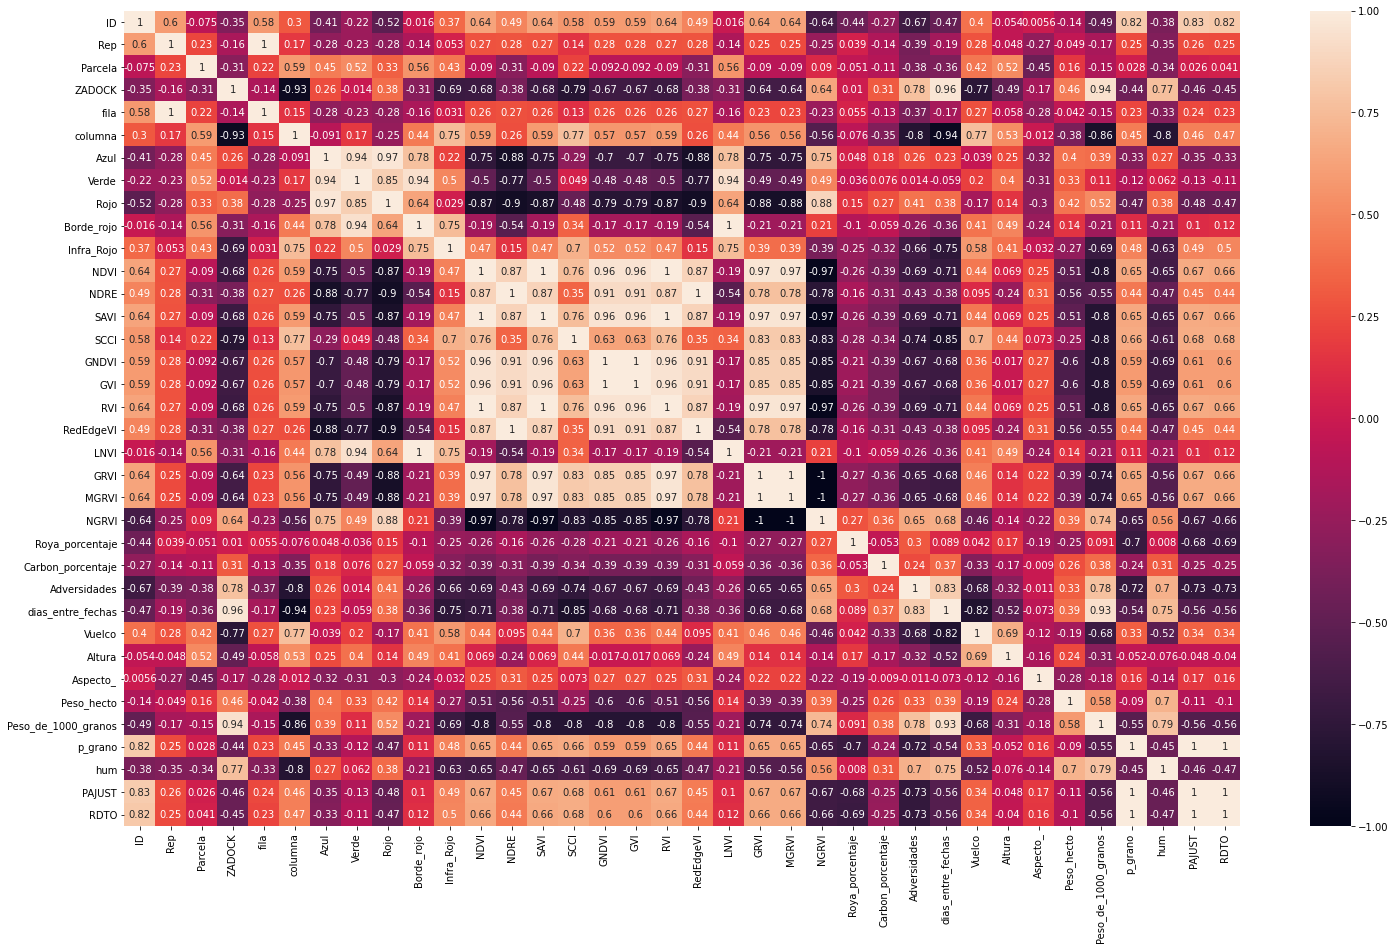

In [82]:
# Ver correlación de lasvariables con nuestros target
correlation = dfa.corr(method ='spearman')
fig, ax=plt.subplots(figsize=(25,15))
sns.heatmap(correlation.corr(), annot=True)

In [83]:
# Removemos columnas irrelevantes o dependientes al target Rendimiento
dfa = dfa.drop(['p_grano', 'Peso_hecto','Peso_de_1000_granos','hum','Aspecto_','Altura','Vuelco','PAJUST'], axis=1)
# Removemos columnas irrelevantes o dependientes al target ZADOCK
#dfa = dfa.drop(['Fecha_de_espigazon','Fecha_de_madurez','dias_entre_fechas'], axis=1) revisar, no estoy seguro de quitar esto si hay que limpiarlos


In [84]:
dfa.head()

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya_porcentaje,Manchas_Foliares,Fusariosis,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,RDTO
24515,4173,-2.057.273.664.866.810,-2.120.803.205.343.770,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,54000,12090,52100,33080,17637,-0.4942,-0.3045,-0.7413,0.6162,0.1866,1.4588,0.3385,-0.6289,10.4067,-0.6233,-0.8978,-1.1138,1,cero,cero,0,0.0,2018-12-10,2018-01-12,50.0,2046
24664,4322,-2.057.276.113.105.650,-2.120.801.895.783.830,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,62100,15180,80000,43790,20404,-0.5936,-0.3643,-0.8903,0.6138,0.1468,1.3441,0.2551,-0.7637,10.6872,-0.6810,-0.9305,-1.0747,1,cero,cero,0,0.0,2018-12-10,2018-01-12,50.0,2046
24665,4323,-2.057.275.987.575.590,-2.120.801.856.909.640,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,65800,16270,77100,46000,21829,-0.5587,-0.3564,-0.8380,0.6378,0.1459,1.3417,0.2831,-0.7454,10.7364,-0.6515,-0.9147,-1.0932,1,cero,cero,0,0.0,2018-12-10,2018-01-12,50.0,2046
24666,4324,-2.057.275.861.235.600,-2.120.801.818.036.350,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,63800,15540,78500,46320,22299,-0.5576,-0.3501,-0.8363,0.6279,0.1786,1.4349,0.2841,-0.7310,10.7433,-0.6695,-0.9246,-1.0816,1,cero,cero,0,0.0,2018-12-10,2018-01-12,50.0,2046
24667,4325,-2.057.275.734.895.600,-2.120.801.779.162.160,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,54400,12940,59700,38510,19311,-0.5112,-0.3320,-0.7668,0.6496,0.1975,1.4923,0.3235,-0.6902,10.5587,-0.6437,-0.9103,-1.0986,1,cero,cero,0,0.0,2018-12-10,2018-01-12,50.0,2046


####3.3. Renombrar Variables
Algunos names son muy largos

In [85]:
#ya lo hicimos arriba

####3.4. Categorizar Variables que Contengan “Otros”
#####Sobretodo la variables de enfermedades, como Carbón, fusariosis,etc, presentan desbalance en los niveles de sus categorías. Decidir si nombrar otros y agrupar a las que contengan menos entrada

In [86]:
dfa=pd.get_dummies(dfa, columns=['Fusariosis','Manchas_Foliares'], drop_first=True) #agrupadas en 0 y 1
dfa.head()

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya_porcentaje,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,RDTO,Fusariosis_otros,Manchas_Foliares_otros
24515,4173,-2.057.273.664.866.810,-2.120.803.205.343.770,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,54000,12090,52100,33080,17637,-0.4942,-0.3045,-0.7413,0.6162,0.1866,1.4588,0.3385,-0.6289,10.4067,-0.6233,-0.8978,-1.1138,1,0,0.0,2018-12-10,2018-01-12,50.0,2046,0,0
24664,4322,-2.057.276.113.105.650,-2.120.801.895.783.830,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,62100,15180,80000,43790,20404,-0.5936,-0.3643,-0.8903,0.6138,0.1468,1.3441,0.2551,-0.7637,10.6872,-0.6810,-0.9305,-1.0747,1,0,0.0,2018-12-10,2018-01-12,50.0,2046,0,0
24665,4323,-2.057.275.987.575.590,-2.120.801.856.909.640,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,65800,16270,77100,46000,21829,-0.5587,-0.3564,-0.8380,0.6378,0.1459,1.3417,0.2831,-0.7454,10.7364,-0.6515,-0.9147,-1.0932,1,0,0.0,2018-12-10,2018-01-12,50.0,2046,0,0
24666,4324,-2.057.275.861.235.600,-2.120.801.818.036.350,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,63800,15540,78500,46320,22299,-0.5576,-0.3501,-0.8363,0.6279,0.1786,1.4349,0.2841,-0.7310,10.7433,-0.6695,-0.9246,-1.0816,1,0,0.0,2018-12-10,2018-01-12,50.0,2046,0,0
24667,4325,-2.057.275.734.895.600,-2.120.801.779.162.160,2daSiembra,CL,Variedad_K,2,89,4.3,2,43,54400,12940,59700,38510,19311,-0.5112,-0.3320,-0.7668,0.6496,0.1975,1.4923,0.3235,-0.6902,10.5587,-0.6437,-0.9103,-1.0986,1,0,0.0,2018-12-10,2018-01-12,50.0,2046,0,0


####3.5. Agregar Metadata a los Datos
#####Cuando y como fueron obtenidos, limpieza realizada, decisiones implementadas, asunciones, etc.




#II.Incorporación de datos climáticos

####**1. Incorporación de información climática**

##### Variables climáticas a utilizar para incorporar al dataset. Explorar

In [87]:
dfc=dfc.reset_index()
dfc['Fecha']=pd.to_datetime(dfc.Fecha)
dfc_2=dfc.iloc[:, [0,3,6,9,12,14,17]] #trabajamos con los promedios
dfc_2.head()

,Fecha,Temp_centigrados_Máx,Presion_hPa_Máx,Temp_suelo_centigrados_Máx,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Máx,Hum_porcentajeHR_Máx
0,2018-01-09,13.09,991.250,14.2,1.2,27.278,79.58
1,2018-04-09,25.52,986.875,18.6,0.0,35.667,85.07
2,2018-06-09,29.19,982.500,21.7,0.0,21.304,88.56
3,2018-07-09,27.70,985.625,22.0,0.0,22.712,83.58
4,2018-08-09,29.86,985.625,22.2,0.0,21.585,89.92


####**2. Unificar**

#####Unificar el dataset obtenido (luego de aplicar la limpieza) con los datos climáticos.

In [88]:
dron_final=merged_inner = pd.merge(left=dfa,right=dfc_2, left_on='Fecha_de_espigazon', right_on='Fecha')

In [89]:
dron_final.sample(20)

,ID,Longitude,Latitude,Conjunto_de_datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde_rojo,Infra_Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya_porcentaje,Carbon_porcentaje,Adversidades,Fecha_de_espigazon,Fecha_de_madurez,dias_entre_fechas,RDTO,Fusariosis_otros,Manchas_Foliares_otros,Fecha,Temp_centigrados_Máx,Presion_hPa_Máx,Temp_suelo_centigrados_Máx,Intende_Lluvia_mm_h,Vel_de_Viento_Km_h_Máx,Hum_porcentajeHR_Máx
2494,6207,-2.057.308.599.437.540,-2.120.848.175.018.890,1er Siembra,CC,Variedad_Q,2,50,6.5,2,10,44100,10520,39700,28090,16302,-0.4178,-0.2655,-0.6267,0.6356,0.2156,1.5496,0.4106,-0.5441,10.2432,-0.5810,-0.8688,-1.1510,0,0,0.00,2018-09-15,2018-11-20,66.0,6009,0,0,2018-09-15,24.35,979.375,21.0,0.0,19.835,100.00
17058,12772,-2.057.298.557.853.670,-2.120.828.819.925.300,1er Siembra,CL,Variedad_L,1,3,5.7,1,16,52400,11190,43500,26670,13173,-0.5351,-0.3388,-0.8027,0.6330,0.0814,1.1772,0.3028,-0.7054,10.1913,-0.5908,-0.8759,-1.1417,0,0,0.00,2018-02-10,2018-11-23,52.0,6532,0,0,2018-02-10,21.71,985.000,19.9,0.0,20.539,90.07
4801,10122,-2.057.301.945.541.750,-2.120.847.154.581.530,1er Siembra,CC,Variedad_O,3,65,6.1,3,6,52700,12810,63800,31740,12738,-0.6671,-0.4272,-1.0007,0.6404,-0.0028,0.9944,0.1997,-0.9130,10.3653,-0.6656,-0.9225,-1.0840,0,0,0.00,2018-09-16,2018-11-28,73.0,4979,0,0,2018-09-16,24.92,979.375,20.2,1.2,16.657,97.80
21653,16764,-2.057.300.434.324.150,-2.120.834.043.589.810,1er Siembra,CL,Variedad_K,2,15,5.9,2,21,57700,14830,58900,38960,20657,-0.4807,-0.3070,-0.7210,0.6387,0.1642,1.3929,0.3507,-0.6345,10.5703,-0.5977,-0.8808,-1.1354,1,0,0.00,2018-05-10,2018-11-26,52.0,5046,0,0,2018-05-10,24.76,988.750,22.2,0.0,28.324,76.66
19222,12177,-2.057.284.143.780.590,-2.120.818.308.617.710,2daSiembra,CC,Variedad_C,2,120,5.8,2,36,53900,11910,41900,29720,13750,-0.5058,-0.3674,-0.7588,0.7263,0.0717,1.1545,0.3282,-0.7708,10.2996,-0.5573,-0.8505,-1.1758,0,0,0.00,2018-09-30,2018-11-30,61.0,6189,0,0,2018-09-30,27.38,976.875,22.9,0.0,26.454,91.62
9922,1257,-2.057.277.339.249.460,-2.120.800.855.099.890,2daSiembra,CL,Variedad_A,1,78,4.3,1,43,44200,10990,39500,31430,19255,-0.3446,-0.2402,-0.5168,0.6971,0.2733,1.7520,0.4875,-0.4900,10.3555,-0.5647,-0.8563,-1.1678,1,0,0.00,2018-10-14,2018-04-12,51.0,3744,0,0,2018-10-14,26.38,985.000,14.5,0.0,17.542,90.86
3760,3060,-2.057.310.309.073.970,-2.120.841.606.160.000,1er Siembra,CC,Variedad_Q,1,38,6.5,1,5,57700,14860,66300,38510,16464,-0.6021,-0.4010,-0.9032,0.6660,0.0512,1.1079,0.2483,-0.8497,10.5587,-0.6338,-0.9043,-1.1058,0,0,0.05,2018-09-16,2018-11-19,64.0,4636,1,0,2018-09-16,24.92,979.375,20.2,1.2,16.657,97.80
6974,9505,-2.057.299.084.270.150,-2.120.846.143.053.450,1er Siembra,CC,Variedad_G,3,63,6.7,3,4,58900,12920,69600,31690,15738,-0.6312,-0.3363,-0.9467,0.5329,0.0983,1.2181,0.2261,-0.6999,10.3638,-0.6869,-0.9334,-1.0714,1,0,0.10,2018-09-14,2018-11-19,66.0,4428,1,0,2018-09-14,24.33,983.750,20.8,0.0,13.217,96.91
16383,21611,-2.057.296.337.999.460,-2.120.836.780.142.180,1er Siembra,CL,Variedad_A,3,30,5.7,3,21,50400,14380,56500,39330,19836,-0.4803,-0.3295,-0.7204,0.6860,0.1595,1.3794,0.3511,-0.6845,10.5797,-0.5942,-0.8783,-1.1385,1,0,0.00,2018-02-10,2018-11-23,52.0,5994,0,0,2018-02-10,21.71,985.000,19.9,0.0,20.539,90.07
20497,13938,-2.057.301.113.804.890,-2.120.832.576.104.210,1er Siembra,CL,Variedad_N,1,7,5.9,1,20,48100,11560,38100,28570,13295,-0.4826,-0.3649,-0.7239,0.7560,0.0698,1.1501,0.3490,-0.7650,10.2601,-0.5344,-0.8314,-1.2028,1,0,0.00,2018-09-30,2018-11-28,59.0,7542,1,0,2018-09-30,27.38,976.875,22.9,0.0,26.454,91.62


In [90]:
dron_final.to_csv('dron_final.csv', index=False) 